In [22]:
import pandas as pd
df = pd.read_csv("cities_by_hours.csv",parse_dates=["Datetime"])
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [23]:
((df.isnull().sum())/len(df))*100

City           0.000000
Datetime       0.000000
PM2.5         20.496274
PM10          41.919407
NO            16.476355
NO2           16.545577
NOx           17.407593
NH3           38.501430
CO            12.222073
SO2           18.417517
O3            18.252940
C6H6          23.117923
C7H8          31.164683
C8H10         64.393996
AQI           18.234858
AQI_Bucket    18.234858
dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   City        707875 non-null  object        
 1   Datetime    707875 non-null  datetime64[ns]
 2   PM2.5       562787 non-null  float64       
 3   PM10        411138 non-null  float64       
 4   NO          591243 non-null  float64       
 5   NO2         590753 non-null  float64       
 6   NOx         584651 non-null  float64       
 7   NH3         435333 non-null  float64       
 8   CO          621358 non-null  float64       
 9   SO2         577502 non-null  float64       
 10  O3          578667 non-null  float64       
 11  C6H6        544229 non-null  float64       
 12  C7H8        487268 non-null  float64       
 13  C8H10       252046 non-null  float64       
 14  AQI         578795 non-null  float64       
 15  AQI_Bucket  578795 non-null  object        
dtypes:

<AxesSubplot:>

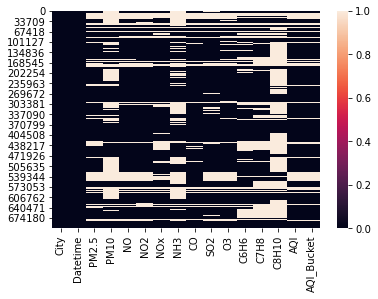

In [25]:
#visualizing the null values using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())

In [26]:
#droping C8H10
df.drop(['C8H10'], axis = 1,inplace=True )

In [27]:
df['year']=(df['Datetime']).dt.year
df['month']=(df['Datetime']).dt.month
df['time']=(df['Datetime']).dt.time
df.head(5)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,year,month,time
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,NaN,NaN,2015,1,01:00:00
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,NaN,NaN,2015,1,02:00:00
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,NaN,NaN,2015,1,03:00:00
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,NaN,NaN,2015,1,04:00:00
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,NaN,NaN,2015,1,05:00:00


In [28]:
col=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'C6H6', 'C7H8']
for c in col:
    df[c].fillna((df[c].mean()),inplace=True)


In [29]:
df.head()


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,year,month,time
0,Ahmedabad,2015-01-01 01:00:00,67.622994,119.075804,1.00,40.01,36.37,23.607959,1.00,122.07,34.798979,0.0,0.0,NaN,NaN,2015,1,01:00:00
1,Ahmedabad,2015-01-01 02:00:00,67.622994,119.075804,0.02,27.75,19.73,23.607959,0.02,85.90,34.798979,0.0,0.0,NaN,NaN,2015,1,02:00:00
2,Ahmedabad,2015-01-01 03:00:00,67.622994,119.075804,0.08,19.32,11.08,23.607959,0.08,52.83,34.798979,0.0,0.0,NaN,NaN,2015,1,03:00:00
3,Ahmedabad,2015-01-01 04:00:00,67.622994,119.075804,0.30,16.45,9.20,23.607959,0.30,39.53,153.580000,0.0,0.0,NaN,NaN,2015,1,04:00:00
4,Ahmedabad,2015-01-01 05:00:00,67.622994,119.075804,0.12,14.90,7.85,23.607959,0.12,32.63,34.798979,0.0,0.0,NaN,NaN,2015,1,05:00:00


In [31]:
# setting index of dataframe to date

df.set_index(df["Datetime"],drop=True,inplace=True)

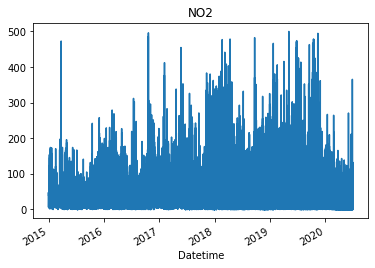

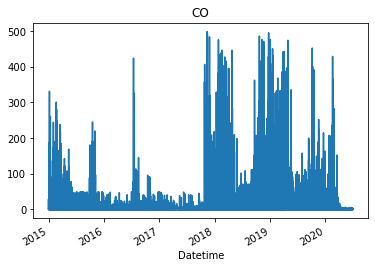

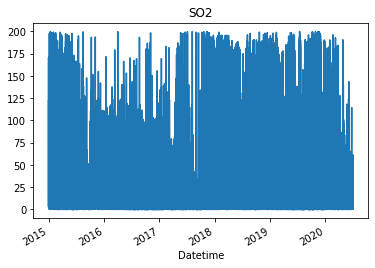

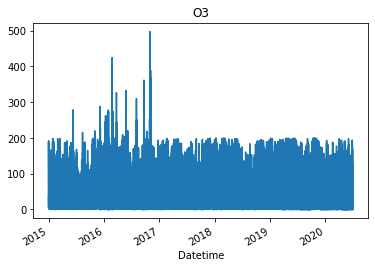

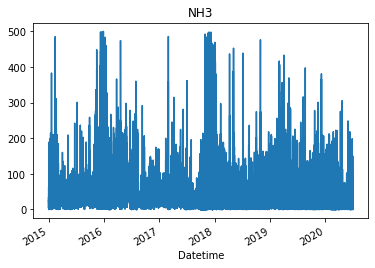

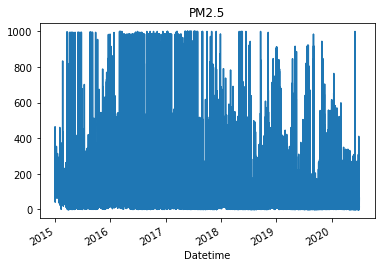

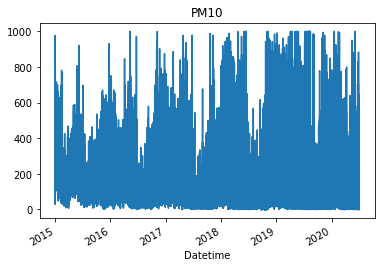

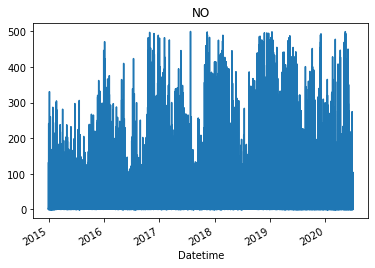

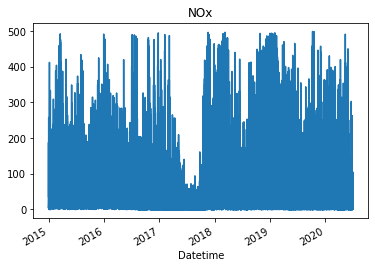

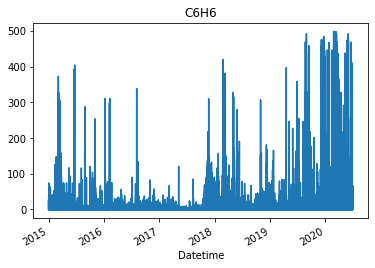

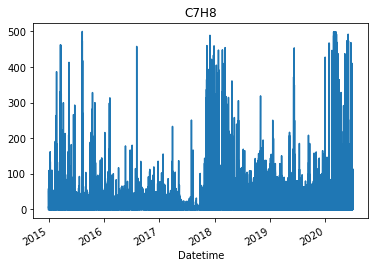

In [32]:
# vizualizing seasonality, trend ,noise in data
import matplotlib.pyplot as plt
gases = ["NO2","CO","SO2","O3","NH3","PM2.5","PM10","NO","NOx","C6H6","C7H8"]
for gas in gases:
    df[gas].plot()
    plt.title(gas)
    plt.show()

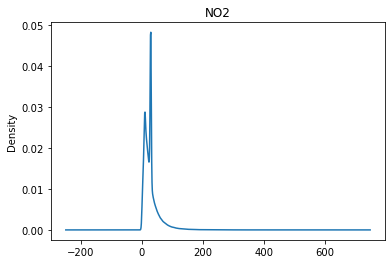

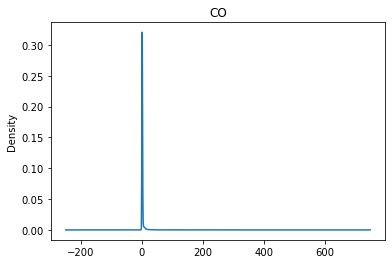

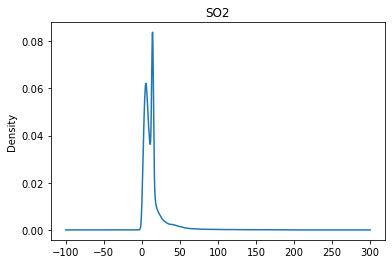

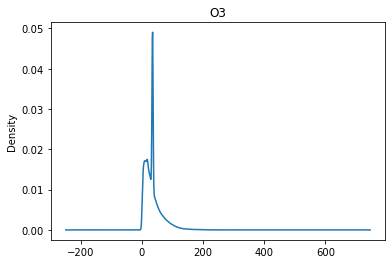

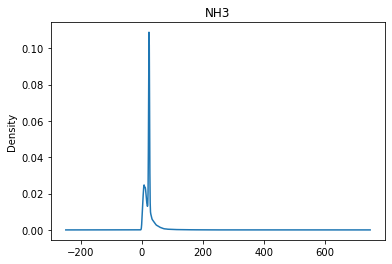

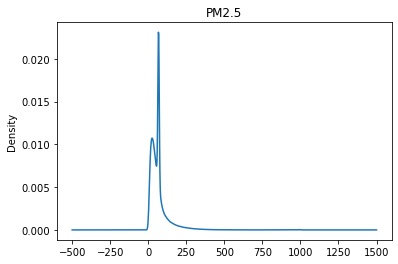

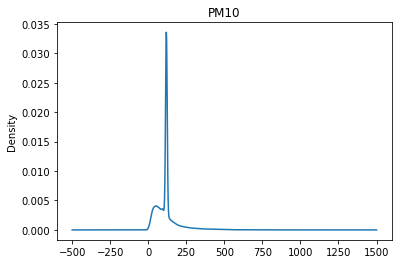

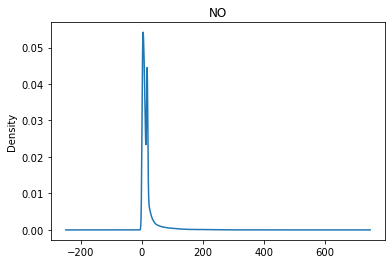

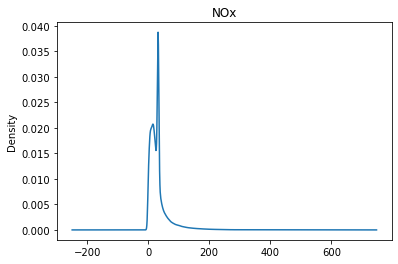

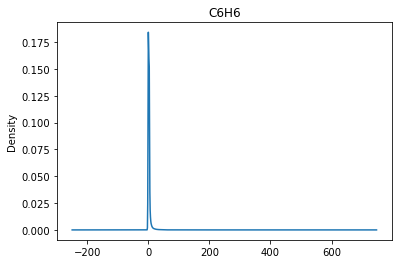

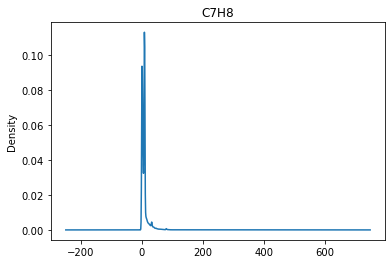

In [33]:
#chechking if data is normally distributed or not
gases = ["NO2","CO","SO2","O3","NH3","PM2.5","PM10","NO","NOx","C6H6","C7H8"]
for gas in gases:
    df[gas].plot(kind='kde')
    plt.title(gas)
    plt.show()

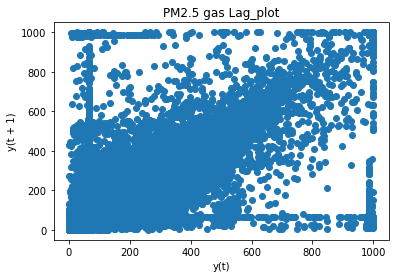

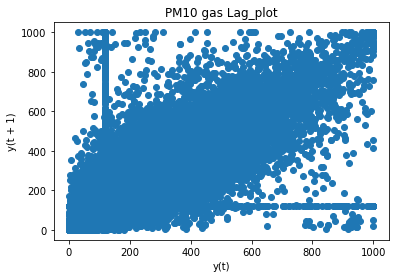

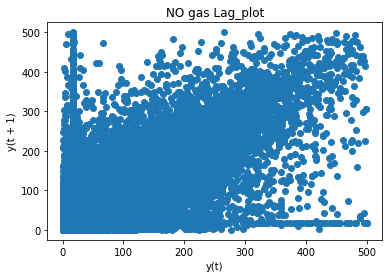

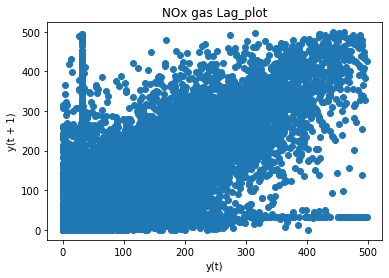

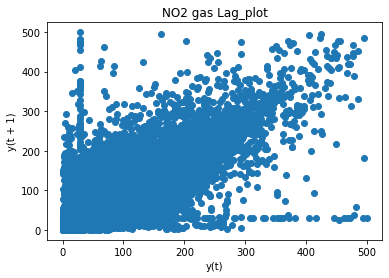

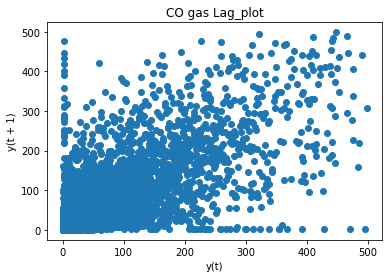

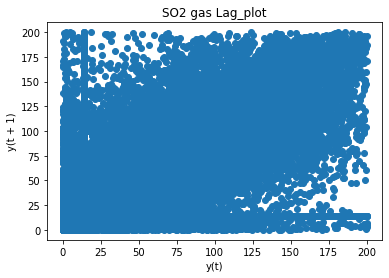

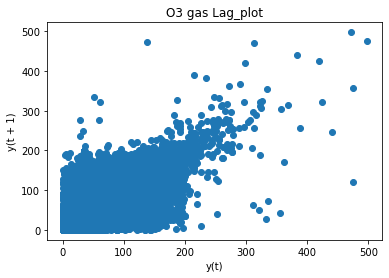

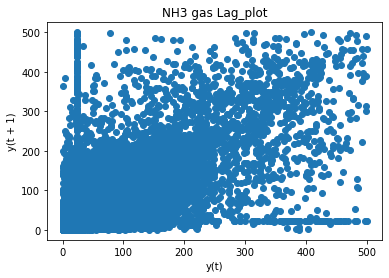

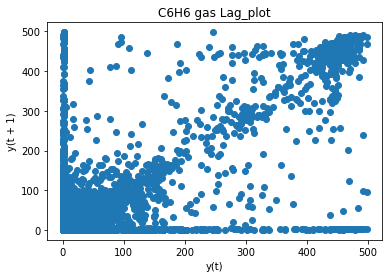

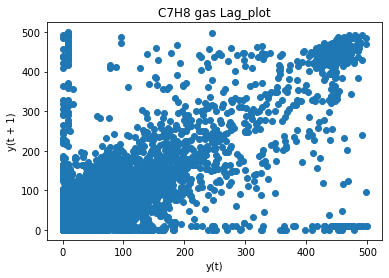

KeyError: 'PM'

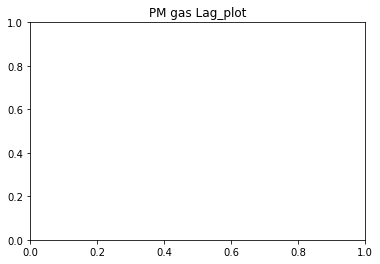

In [34]:
# vizualizing lag plot
from pandas.plotting import lag_plot
gases = ["PM2.5","PM10","NO","NOx","NO2","CO","SO2","O3","NH3","C6H6","C7H8","PM","Nitric"]
for gas in gases:
    plt.title("{} gas Lag_plot".format(gas))
    lag_plot(df[gas])
    plt.show()

<AxesSubplot:>

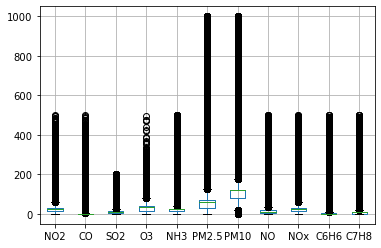

In [35]:
# vizualising outliers
df.boxplot(column=["NO2","CO","SO2","O3","NH3","PM2.5","PM10","NO","NOx","C6H6","C7H8"])

In [44]:
df["Year"] = df["Datetime"].dt.year
df["Month"] = df["Datetime"].dt.month
# AQI_Bucket yearly analysis
year_aqi_bucket=df.groupby(["Year","AQI_Bucket"])["AQI_Bucket"].count()
year_aqi_bucket= pd.DataFrame(year_aqi_bucket)
year_aqi_bucket.columns = ["AQI_Bucket Count"]
year_aqi_bucket.reset_index(inplace=True)
year_aqi_bucket

,Year,AQI_Bucket,AQI_Bucket Count
0,2015,Good,1770
1,2015,Moderate,8408
2,2015,Poor,3166
3,2015,Satisfactory,6930
4,2015,Severe,317
5,2015,Very Poor,1122
6,2016,Good,2658
7,2016,Moderate,13144
8,2016,Poor,4548
9,2016,Satisfactory,10584


In [38]:
year_aqi_bucket_pivot = year_aqi_bucket.pivot_table(index="AQI_Bucket",columns="Year",values="AQI_Bucket Count")
year_aqi_bucket_pivot.fillna(0,inplace=True)

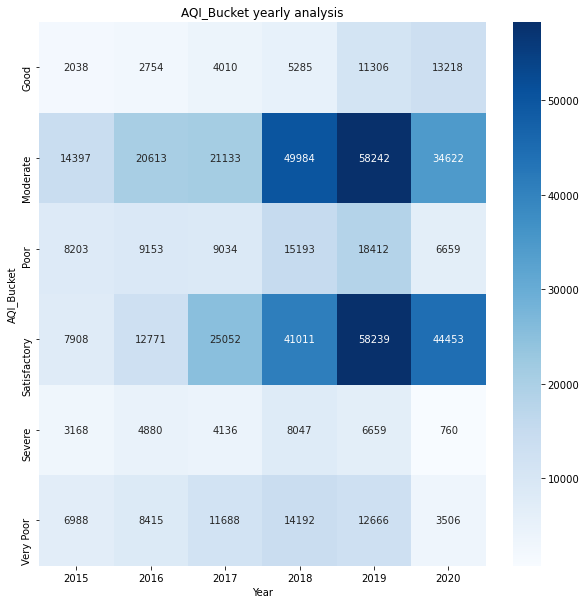

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("AQI_Bucket yearly analysis")
sns.heatmap(year_aqi_bucket_pivot
            ,cmap="Blues",annot=True,fmt="g")
plt.show()

In [41]:
# removing outliers
cols = ["PM2.5","PM10","NO","NOx","NO2","CO","SO2","O3","NH3","C6H6","C7H8"]
from scipy.stats import zscore
for col in cols:
    
    df = (df[(zscore(df[col])>-3) & (zscore(df[col])<3)])

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Satisfactory    160968
Moderate        125081
Good             35608
Poor             27844
Very Poor        14491
Severe            2092
Name: AQI_Bucket, dtype: int64

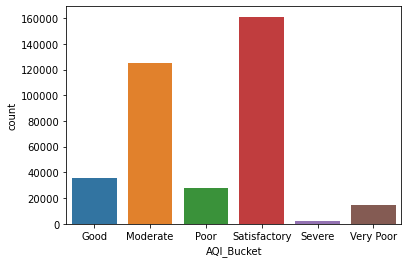

In [42]:

df['AQI_Bucket'] = df['AQI_Bucket'].astype('category')
sns.countplot('AQI_Bucket',data=df)
df['AQI_Bucket'].value_counts()

<ipython-input-46-05e4cd6ed879>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8'].sum()).reset_index()


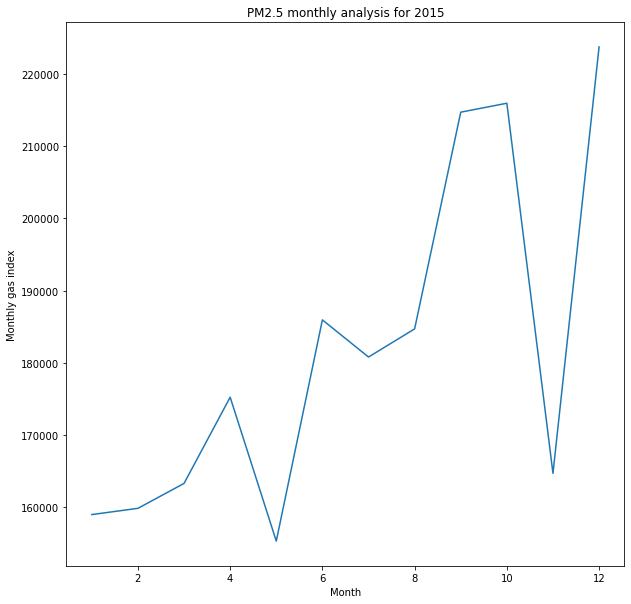

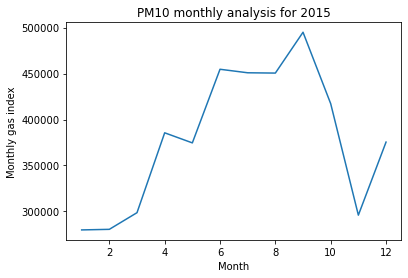

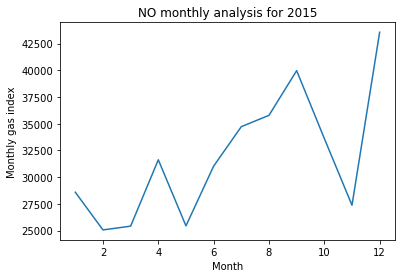

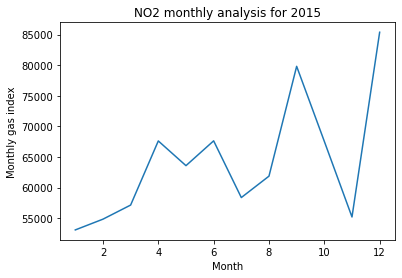

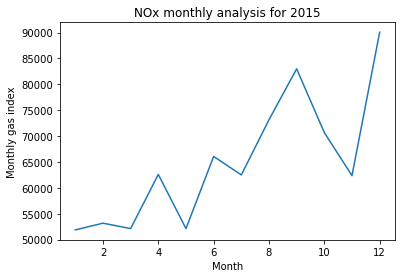

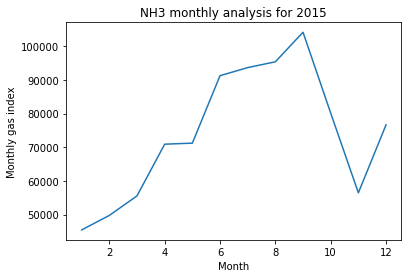

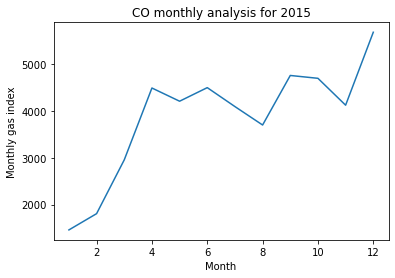

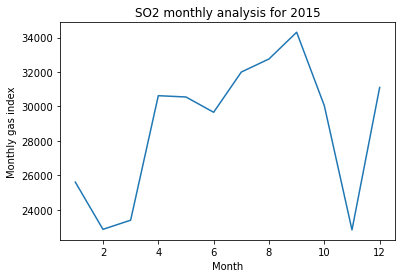

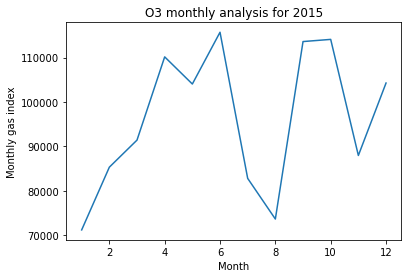

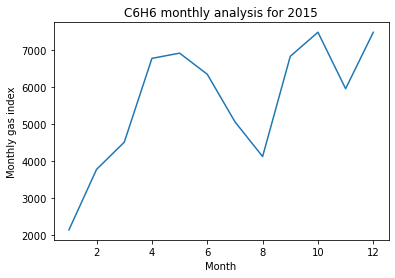

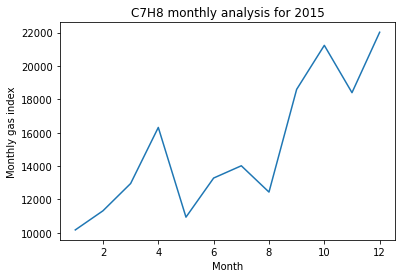

<ipython-input-46-05e4cd6ed879>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8'].sum()).reset_index()


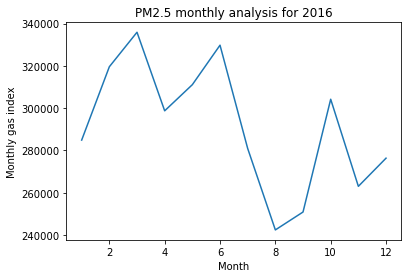

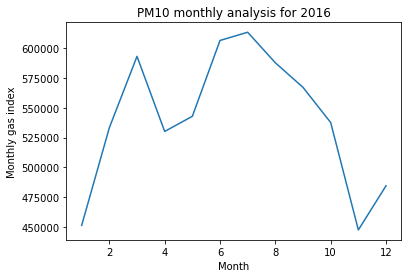

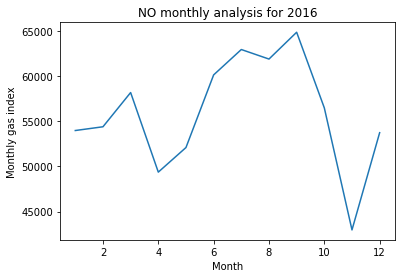

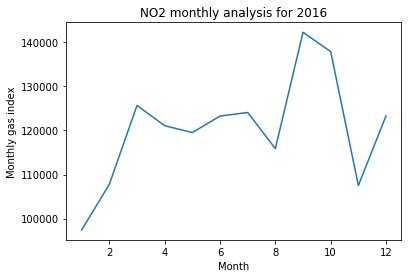

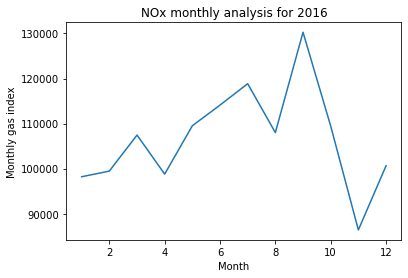

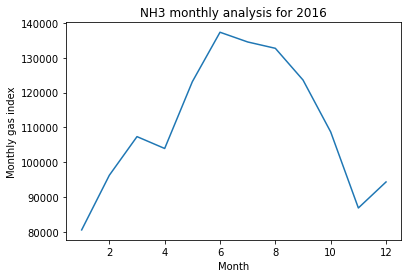

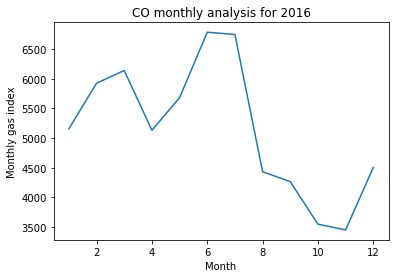

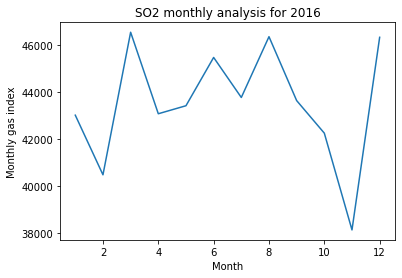

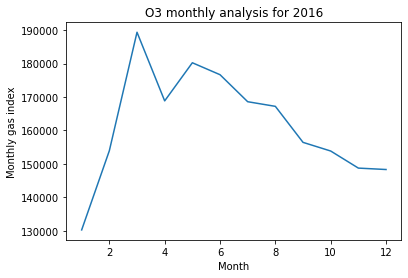

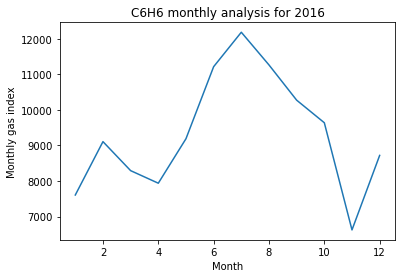

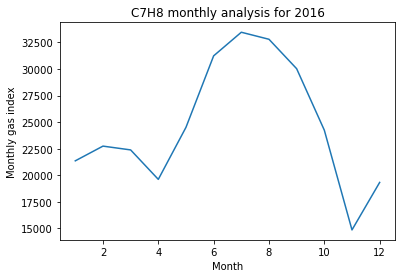

<ipython-input-46-05e4cd6ed879>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8'].sum()).reset_index()


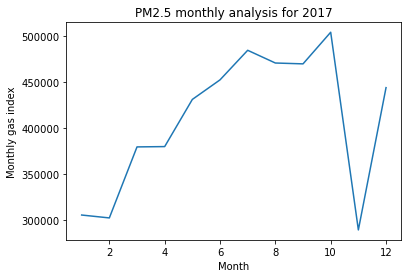

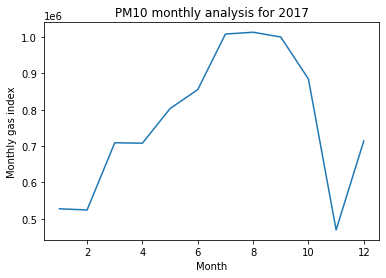

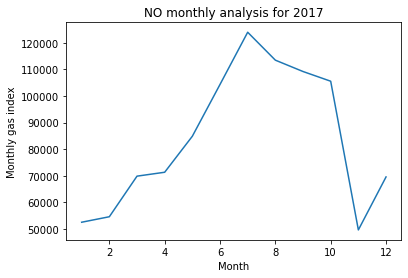

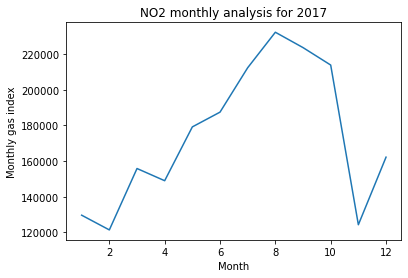

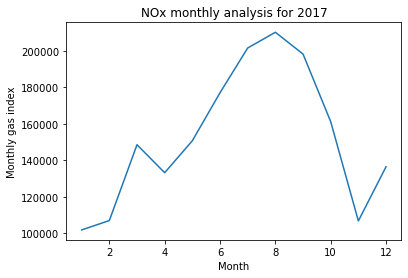

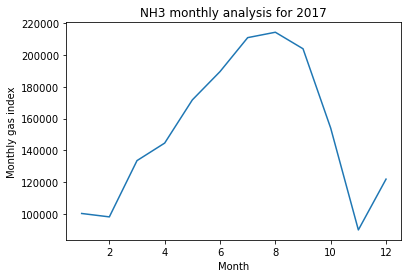

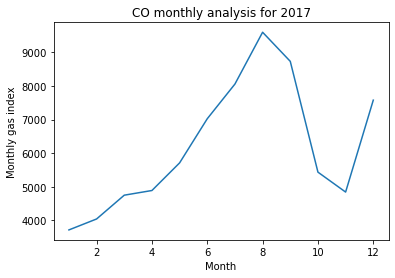

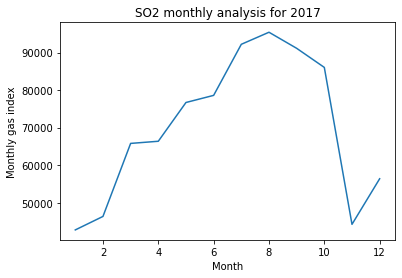

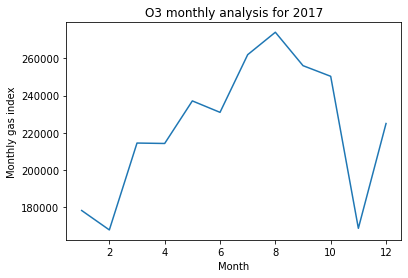

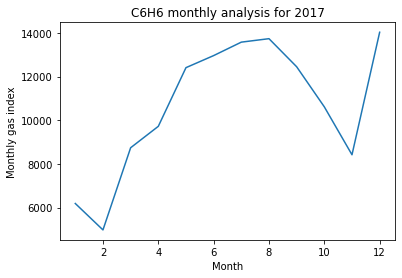

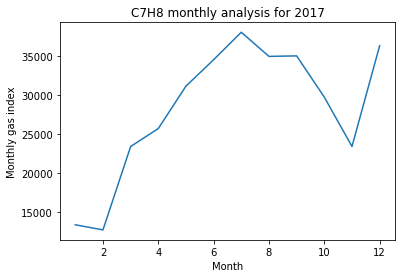

<ipython-input-46-05e4cd6ed879>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8'].sum()).reset_index()


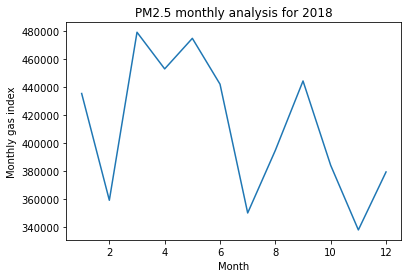

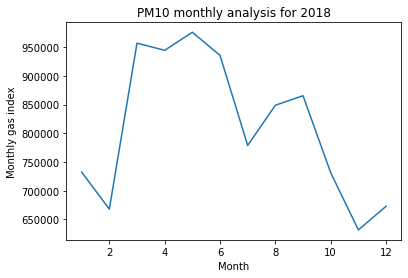

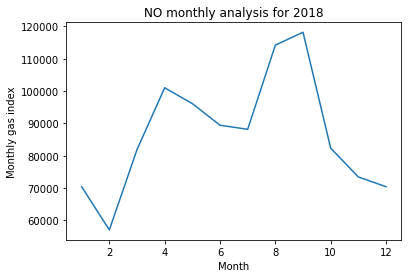

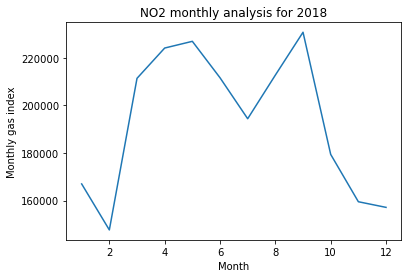

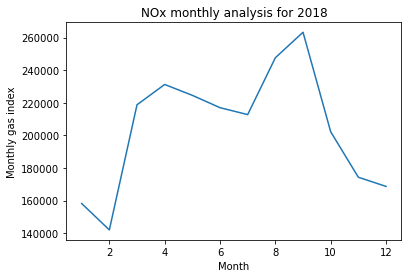

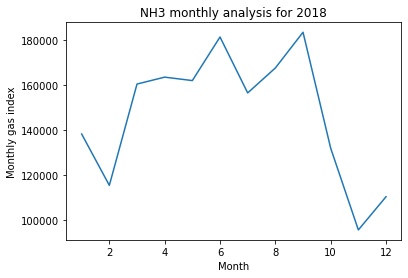

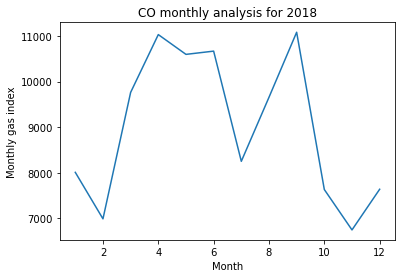

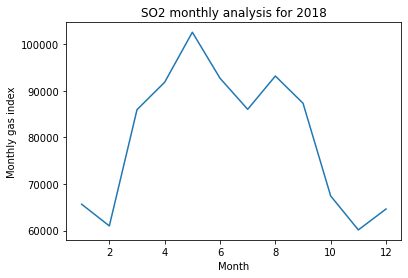

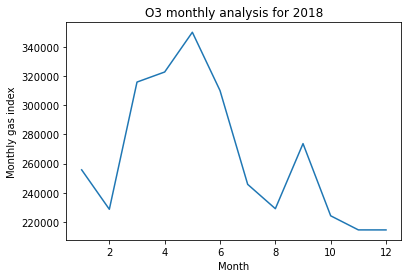

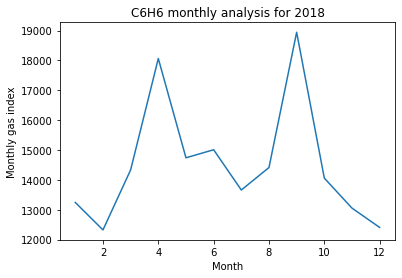

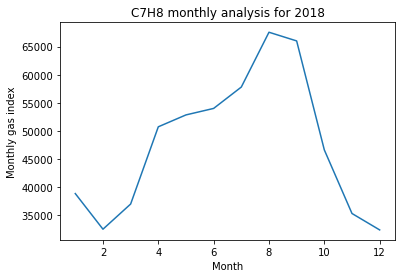

<ipython-input-46-05e4cd6ed879>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8'].sum()).reset_index()


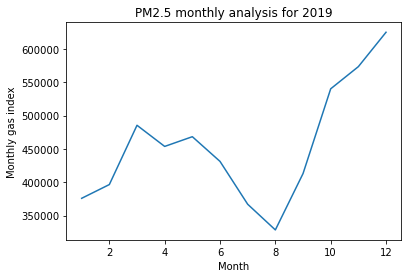

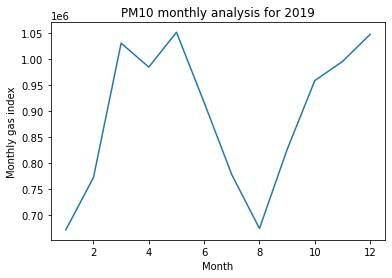

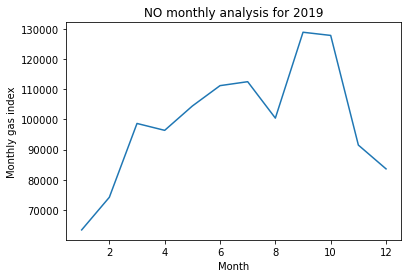

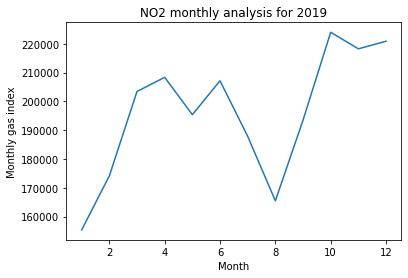

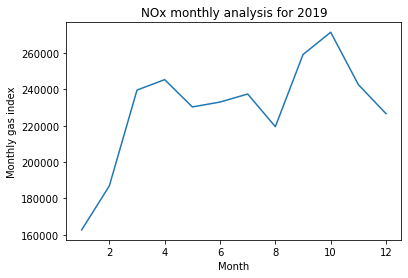

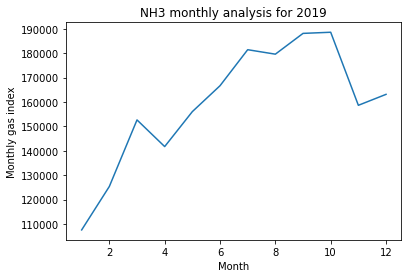

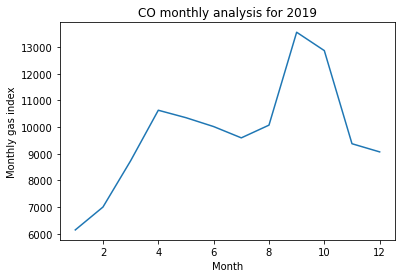

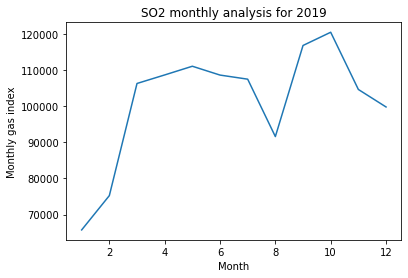

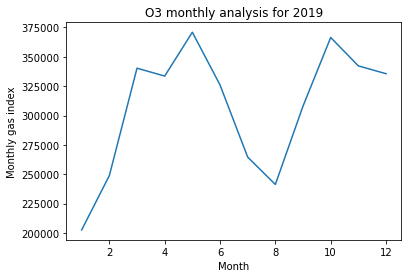

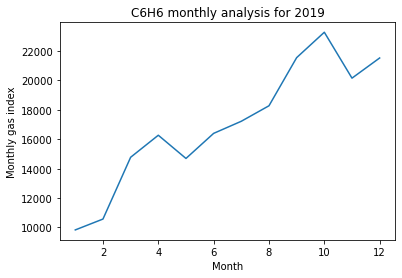

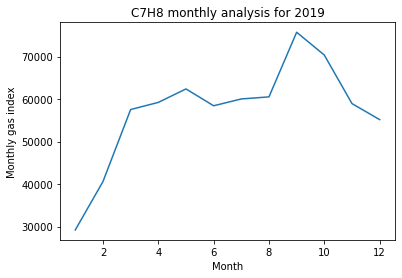

<ipython-input-46-05e4cd6ed879>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8'].sum()).reset_index()


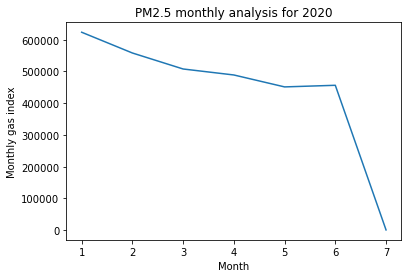

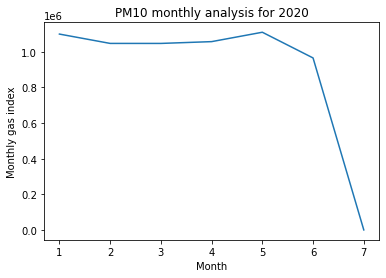

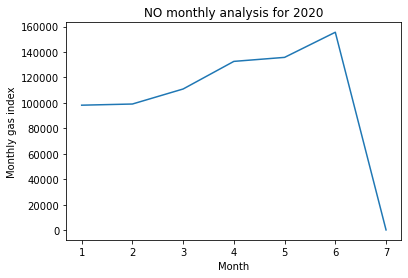

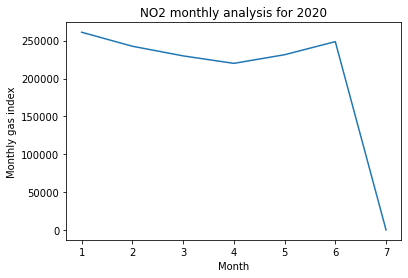

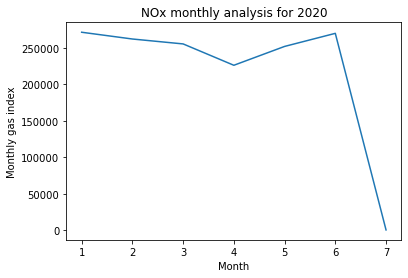

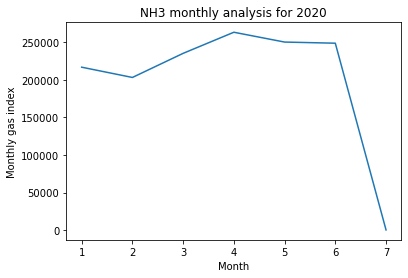

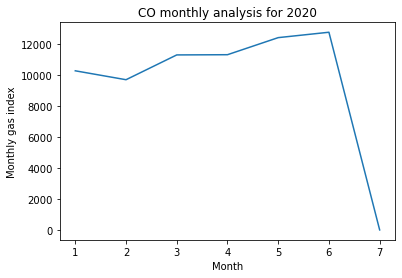

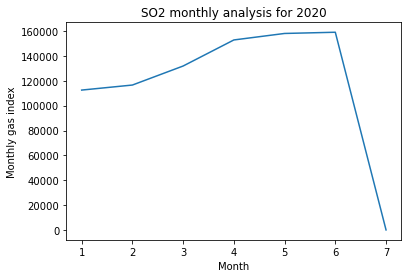

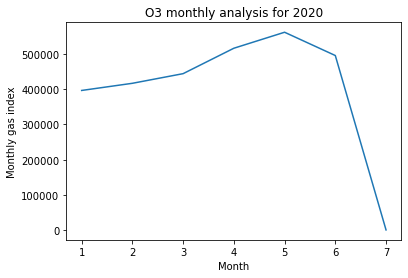

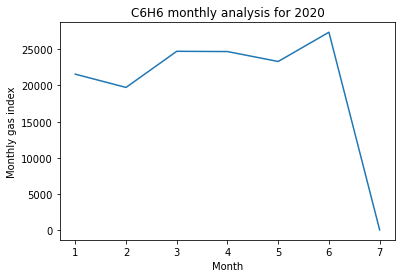

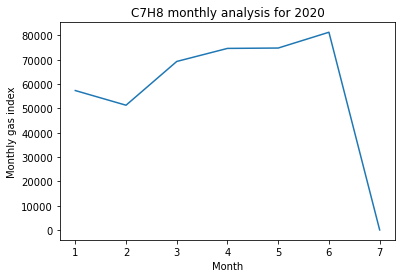

In [46]:
df_temp = df.iloc[:,2:13]

df_temp_col=df_temp.columns
df_temp["Year"] = df["Year"]
df_temp["Month"] = df["Month"]
# gases monthly analysis every year
g_m_a= pd.DataFrame(df_temp.groupby(["Year","Month"])[df_temp_col].sum().reset_index())
year = [2015,2016,2017,2018,2019,2020]
fig = plt.figure(figsize=(10,10))
for y in (year):
   
    gma = g_m_a[g_m_a["Year"]==y]
    gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8'].sum()).reset_index()
    column = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8']
    for col in column:
        plt.title("{} monthly analysis for {}".format(col,y))
        plt.xlabel("Month")
        
        plt.ylabel("Monthly gas index")
        plt.plot(gma_y["Month"],gma_y[col])
        plt.show()